In [1]:
using SchwarzChristoffel

In [2]:
p = Polygon([-1.0,0.2,1.0,-1.0],[-1.0,-1.0,0.5,1.0])

Polygon with 4 vertices at
             (-1.0,-1.0) (0.2,-1.0) (1.0,0.5) (-1.0,1.0) 
             interior angles/π = [0.5, 0.656, 0.422, 0.422]


In [5]:
p = Polygon([-1.0-1.0im,1.0-1.0im,1.0+1.0im,-1.0+1.0im])

Polygon with 4 vertices at
             (1.0,-1.0) (-1.0,-1.0) (1.0,1.0) (-1.0,1.0) 
             interior angles/π = [1.75, 1.75, 0.25, 0.25]


In [7]:
p = Polygon([-0.5,0.5],[0.0,0.0])

Polygon with 2 vertices at
             (-0.5,0.0) (0.5,0.0) 
             interior angles/π = [0.0, 0.0]


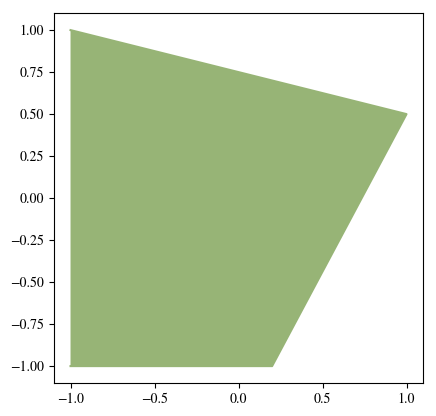

In [7]:
plot(p)

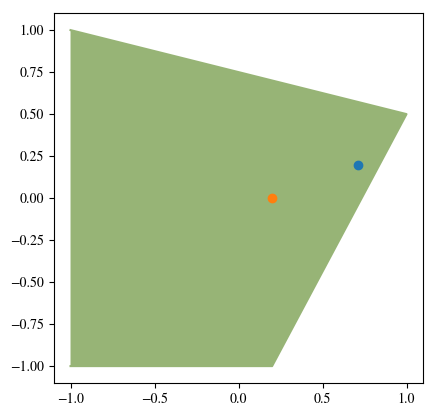

1×2 BitArray{2}:
 true  true

In [6]:
z = [0.71+im*0.2 0.2+im*0]
plot(p)
PyPlot.plot(real.(z),imag.(z),marker="o")
isinpoly.(z,p,1e-5)

In [3]:
m = ExteriorMap(p)

Exterior map with
   vertices: (-1.0,-1.0), (0.2,-1.0), (1.0,0.5), (-1.0,1.0), 
   interior angles/π: 0.5, 0.656, 0.422, 0.422, 
   prevertices on circle: (1.0,0.0), (0.3764,-0.9265), (-0.9024,-0.4309), (-0.1868,0.9824), 
   prevertex angles/π: -0.7291, -0.3519, 0.1291, 0.7111, 
   constant = 0.6722 + 0.7669im, accuracy = 1.0e-8, 
   number of multipole coefficients = 12


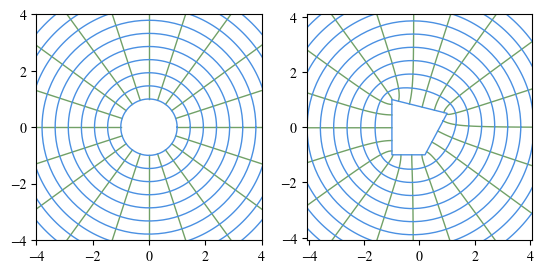

In [4]:
conformal_grid(m)

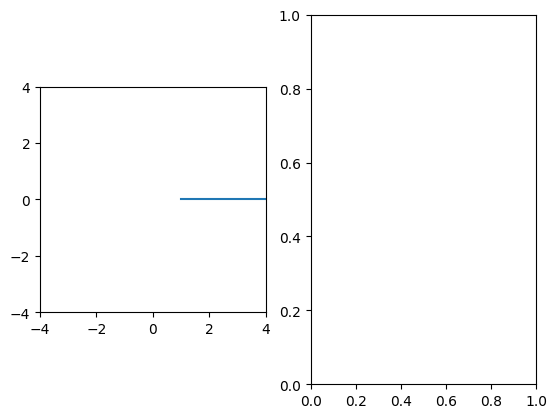

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1326f8d50>

In [48]:
xmaxc = 4.0
rmax = sqrt(2)*xmaxc

nθ = 20
  dθ = 2π/nθ
  θg = 0
  nrg = 100
  rg = linspace(1,rmax,nrg)
ζg = collect(rg*exp(im*θg))
      zg = evaluate(ζg,m)

fig, (ax1,ax2) = PyPlot.subplots(1,2)
ax1[:axis]("scaled")
ax1[:axis]([-xmaxc,xmaxc,-xmaxc,xmaxc])
ax1[:set_xticks](ceil(-xmaxc/2)*2:2:floor(xmaxc/2)*2)
ax1[:set_yticks](ceil(-xmaxc/2)*2:2:floor(xmaxc/2)*2)
ax1[:plot](real(ζg),imag(ζg))

In [11]:
m = ExteriorMap(p;tol=1e-12)

Exterior map with
   vertices: (-1.0,-1.0), (0.2,-1.0), (1.0,0.5), (-1.0,1.0), 
   interior angles/π: 0.5, 0.656, 0.422, 0.422, 
   prevertices on circle: (1.0,0.0), (0.3764,-0.9265), (-0.9024,-0.4309), (-0.1868,0.9824), 
   constant = 0.6722 + 0.7669im, accuracy = 1.0e-12, 
   number of multipole coefficients = 12


In [9]:
prev, C = parameters(m)

(Complex{Float64}[1.0+0.0im, 0.376406-0.926455im, -0.902383-0.430935im, -0.186756+0.982406im], 0.6722109863402015 + 0.7668866078562682im)

In [15]:
ccoeff, dcoeff = coefficients(m);

In [5]:
zeta = [0.1,0.5-0.75im,-0.25-0.3im]
dz, ddz = evalderiv(zeta,m,true);
dz

3-element Array{Complex{Float64},1}:
  67.2068+76.6284im 
 -1.11666+0.544576im
  3.99129-5.30641im 

In [31]:
zeta = [1.0+3.0im,-2.0-2.0im,0.0+1.1im]
evaluate(zeta,m)

3-element Array{Complex{Float64},1}:
  1.0+3.0im
 -2.0-2.0im
  0.0+1.1im

In [16]:
zeta = collect(1.1:0.1:2.0) + 0.1im
dz,ddz = evalderiv(zeta,m)
dz

10-element Array{Complex{Float64},1}:
 0.872356-0.394475im 
 0.901724-0.289355im 
 0.925562-0.217994im 
 0.944059-0.168264im 
 0.958255-0.132657im 
  0.96919-0.106522im 
 0.977695-0.0869128im
 0.984389-0.0719115im
 0.989723-0.0602376im
 0.994025-0.0510144im

In [9]:
evalderiv([zeta],m)

(Complex{Float64}[1.02182+0.00795507im], Complex{Float64}[-0.00722368-0.00170971im])

In [8]:
sum(ccoeff.*zeta[2].^(1:-1:-map.ncoeff))-z[2]

-5.197670379653019e-5 + 0.0004077526683254895im

In [11]:
println(C)

0.6722109863402015 + 0.7668866078562682im
